# Kpop 4th Generation Sales

Steps :
1. Importing libraries
2. loading data
3. Changing data type
4. Data cleaning
5. Visualization

#### 1. Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
import numpy as np
%matplotlib inline
import chart_studio.plotly as py

In [20]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.6.0


In [21]:
import cufflinks as cf

#### 2. Loading data

In [22]:
kpopsales = pd.read_csv('C:/Users/acer/Data Analysis/Projects/Kpop 4th gen sales/Kpop 4th gen sales.csv')
kpopsales

,Artist,title,date,country,sales,peak_chart
0,IZONE,Bloom*iz,2/17/2020,KOR,492504,2
1,IZONE,Bloom*iz,2/17/2020,JPN,23960,3
2,IZONE,TWELVE,10/21/2020,JPN,135113,1
3,IZONE,Color*Iz,10/29/2018,KOR,282816,2
4,IZONE,Color*Iz,10/29/2018,JPN,"48,734",1
...,...,...,...,...,...,...
92,Everglow,Reminiscence,2/3/2020,KOR,30912,4
93,Everglow,Reminiscence,2/3/2020,JPN,1649,48
94,Everglow,-77.82X-78.29,9/21/2020,KOR,49388,4
95,Everglow,Arrival of Everglow,3/18/2019,KOR,28033,6


#### 3. Changing data type

In [23]:
kpopsales.dtypes

Artist        object
title         object
date          object
country       object
sales         object
peak_chart     int64
dtype: object

In [24]:
kpopsales = kpopsales.astype({"Artist":'category',"title":'category',"date":'datetime64',"country":'category',"peak_chart":'category'})
kpopsales.dtypes
# sales column's datatype can not be changed because of wrong writing on some cells

Artist              category
title               category
date          datetime64[ns]
country             category
sales                 object
peak_chart          category
dtype: object

In [25]:
# adding year column
kpopsales['Year'] = kpopsales['date'].dt.strftime('%Y').astype('category')
kpopsales['Yearmonth'] = kpopsales['date'].apply(lambda x: x.strftime('%B-%Y')).astype('category')

#### 4. Data Cleaning

In [26]:
kpopsales['sales'] = kpopsales['sales'].str.replace(',' ,'')

In [27]:
kpopsales['sales'] = kpopsales['sales'].astype('int64')
kpopsales.dtypes

Artist              category
title               category
date          datetime64[ns]
country             category
sales                  int64
peak_chart          category
Year                category
Yearmonth           category
dtype: object

#### 5. Data Visualization

In [12]:
kpopsales.head()

,Artist,title,date,country,sales,peak_chart,Year,Yearmonth
0,IZONE,Bloom*iz,2020-02-17,KOR,492504,2,2020,February-2020
1,IZONE,Bloom*iz,2020-02-17,JPN,23960,3,2020,February-2020
2,IZONE,TWELVE,2020-10-21,JPN,135113,1,2020,October-2020
3,IZONE,Color*Iz,2018-10-29,KOR,282816,2,2018,October-2018
4,IZONE,Color*Iz,2018-10-29,JPN,48734,1,2018,October-2018


In [13]:
# Top Sales Group
kpopsales.groupby('Artist').sum('sales').sort_values(by = 'sales', ascending = False)

,sales
Artist,
IZONE,2356819
Stray Kids,1916965
TXT,1692632
Ateez,1588505
Treasure,1112672
(G)I-dle,787686
ITZY,560073
Cravity,510279
Loona,357581


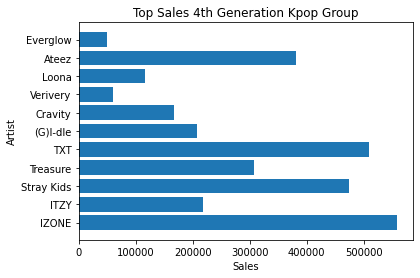

<Figure size 7200x7200 with 0 Axes>

In [14]:
plt.barh(kpopsales['Artist'], kpopsales['sales'])
plt.title("Top Sales 4th Generation Kpop Group")
plt.xlabel("Sales")
plt.ylabel("Artist")
plt.figure(figsize=(100, 100))  # width:20, height:3
plt.show()

In [15]:
# Best region for kpop industries
kpopsales.groupby('country').sum('sales').sort_values(by='sales', ascending=False)

,sales
country,
KOR,10221263
JPN,853998
CHN,182749


<AxesSubplot:xlabel='Year'>

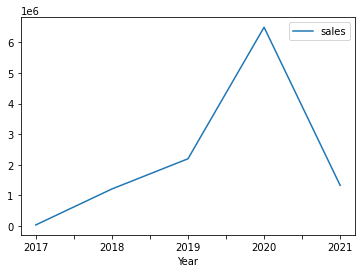

In [31]:
# Sales year on year
kpopsales.groupby('Year').sum('sales').plot()

## Conclusion

1. Sales peaked at 2020. it happened at the same time as the pandemic around the world, but there is no data available to ensure that there is a correlation
2. Korea has the highest market for kpop followed by Japan and China.
3. IZONE is number 1 in term of sales

In [35]:
kpopsales.groupby('Yearmonth').sum()

,sales
Yearmonth,
April-2017,5924
April-2019,17630
April-2020,842030
August-2018,248213
August-2019,28639
August-2020,796028
December-2019,269303
December-2020,447749
February-2019,96823


In [37]:
plt.figure(figsize=(12,3))
plt.plot(kpopsales.groupby('Yearmonth').sum(), kpopsales['Artists'])

KeyError: 'Artists'

<Figure size 864x216 with 0 Axes>